In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('movies.csv')

In [ ]:
df.describe()

In [ ]:
df.info()

In [3]:
df.shape


(10000, 27)

In [ ]:
#  ¿Cuáles son las 10 películas que contaron con más presupuesto?
print(df.sort_values(by='budget', ascending=False).head(10)[['title', 'budget']])

In [ ]:
#¿Cuáles son las 10 películas que más ingresos tuvieron?
print(df.sort_values(by='revenue', ascending=False).head(10)[['title', 'revenue']])

In [ ]:
#¿Cuál es la película que más votos tuvo?
print(df.sort_values(by='voteCount', ascending=False).head(1)[['title', 'voteCount']])

In [ ]:
#¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?
print(df.sort_values(by='voteAvg', ascending=True).head(1)[['title', 'voteAvg']])

In [ ]:
#¿Cuántas películas se hicieron en cada año? 
print(df.copy().groupby(pd.to_datetime(df.copy()['releaseDate']).dt.year).size())

In [ ]:
#¿En qué año se hicieron más películas?

print(df.copy().groupby(pd.to_datetime(df.copy()['releaseDate']).dt.year).size().sort_values(ascending=False).head(1))

In [ ]:
#Top 10 años con más películas hechas

top_10_years = df.copy().groupby(pd.to_datetime(df.copy()['releaseDate']).dt.year).size().sort_values(ascending=False).head(10)
# Imprimir el top 10 de años con más películas
print(top_10_years)


In [ ]:
#Haga un diagrama de las 10 años con mas peliculas producidas
top_10_years.plot(kind='bar')
plt.title('Top 10 Años con Más Películas Producidas')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.show()

Drama          7
Comedy         7
Thriller       3
Action         3
Romance        3
Fantasy        3
Mystery        2
Adventure      2
Horror         2
Crime          1
Documentary    1
Animation      1
Family         1
Name: count, dtype: int64


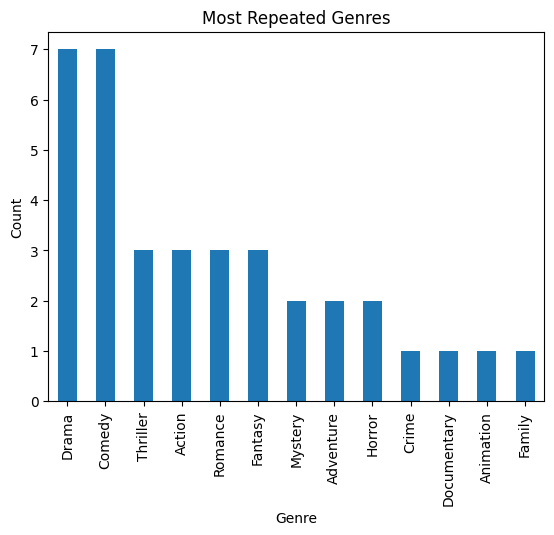

In [15]:
# Asegurándonos de que la columna 'releaseDate' esté en formato de fecha y hora
df['releaseDate'] = pd.to_datetime(df['releaseDate'])

# Ordenar las películas por 'releaseDate' y seleccionar las 20 más recientes
recent_movies = df.sort_values(by='releaseDate', ascending=False).head(20)

# 
# Get all the genres from the "genre" column
all_genres = recent_movies['genres'].str.split('|', expand=True).stack().reset_index(drop=True)

# Count the most repeated genres
most_repeated_genres = all_genres.value_counts()

# Print the most repeated genres
print(most_repeated_genres)
most_repeated_genres.plot(kind='bar')
plt.title('Most Repeated Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


In [ ]:
# Asegurándonos de que la columna 'releaseDate' esté en formato de fecha y hora
df['releaseDate'] = pd.to_datetime(df['releaseDate'])

# Filtrar para excluir películas sin género definido
df_filtered = df[df['genres'].notnull() & (df['genres'] != '')]

# Ordenar las películas por 'releaseDate' y seleccionar las 20 más recientes que tienen género definido
recent_movies = df_filtered.sort_values(by='releaseDate', ascending=False).head(20)

# Extraer el género principal
recent_movies['main_genre'] = recent_movies['genres'].apply(lambda x: x.split('|')[0])

# Mostrar el género principal de las 20 películas más recientes con género definido
print(recent_movies[['title', 'main_genre']])


In [ ]:
# ¿Cuál es el género principal que predomina en el conjunto de datos?
# Crear una copia para evitar modificar el DataFrame original
df_filtered = df[df['genres'].notnull() & (df['genres'] != '')].copy()

# Extraer el género principal
df_filtered['main_genre'] = df_filtered['genres'].apply(lambda x: x.split('|')[0])

# Contar la frecuencia de cada género principal y encontrar el más común
predominant_genre = df_filtered['main_genre'].value_counts().idxmax()

print("El género principal más predominante es:", predominant_genre)


In [ ]:
# Crear una copia para evitar modificar el DataFrame original
df_filtered = df[df['genres'].notnull() & (df['genres'] != '')].copy()

# Extraer el género principal
df_filtered['main_genre'] = df_filtered['genres'].apply(lambda x: x.split('|')[0])

# Contar la frecuencia de cada género principal
genre_counts = df_filtered['main_genre'].value_counts()

# Graficar el número de películas por género principal
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Frecuencia de Géneros Principales en Películas')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Crear una copia para evitar modificar el DataFrame original
df_filtered = df[df['genres'].notnull() & (df['genres'] != '')].copy()

# Extraer el género principal
df_filtered['main_genre'] = df_filtered['genres'].apply(lambda x: x.split('|')[0])

# Contar la frecuencia de cada género principal
genre_counts = df_filtered['main_genre'].value_counts()

# Graficar el número de películas por género principal en un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Géneros Principales en Películas')
plt.axis('equal')  # Esto asegura que el gráfico de pastel sea circular.
plt.show()


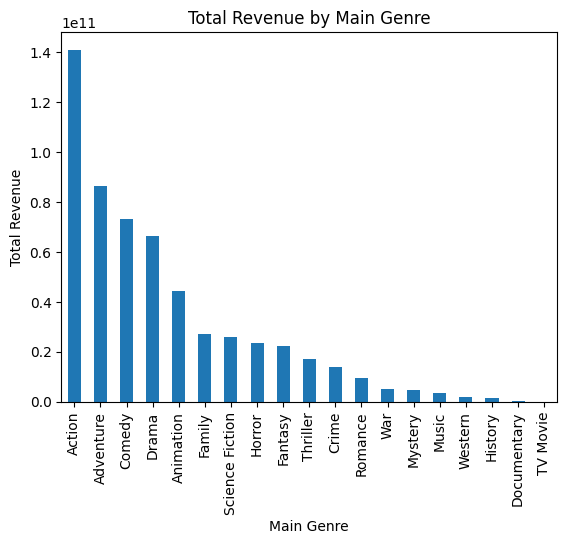

Ganancias totales por género principal:
main_genre
Action             140936671043
Adventure           86313291491
Comedy              72990070028
Drama               66415119599
Animation           44193668686
Family              27070466981
Science Fiction     25771021939
Horror              23483468549
Fantasy             22309474780
Thriller            17111426999
Crime               13764408000
Romance              9582546901
War                  5151630856
Mystery              4640756330
Music                3493810817
Western              1843584942
History              1481950337
Documentary           352161888
TV Movie                      0
Name: revenue, dtype: int64


In [11]:
#¿Las películas de qué genero principal obtuvieron mayores ganancias?

# Filtrar para excluir películas sin género definido o sin datos de ganancias y crear una copia
df_filtered = df[(df['genres'].notnull() & (df['genres'] != '')) & df['revenue'].notnull()].copy()

# Extraer el género principal
df_filtered['main_genre'] = df_filtered['genres'].apply(lambda x: x.split('|')[0])

# Agrupar por género principal y sumar las ganancias
genre_revenue = df_filtered.groupby('main_genre')['revenue'].sum()

# Ordenar los géneros por ganancias totales
sorted_genre_revenue = genre_revenue.sort_values(ascending=False)

# Plot the total revenue by main genre
sorted_genre_revenue.plot(kind='bar')
plt.title('Total Revenue by Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('Total Revenue')
plt.show()

print("Ganancias totales por género principal:")
print(sorted_genre_revenue)


In [ ]:
#
# NADA Q VER
#

# Asegurarse de que 'actorsAmount' y 'revenue' son numéricos
df['actorsAmount'] = pd.to_numeric(df['actorsAmount'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Calcular la correlación
correlation = df[['actorsAmount', 'revenue']].corr()

# Visualizar la correlación con un mapa de calor
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlación entre Cantidad de Actores e Ingresos")
plt.show()


In [ ]:
#
# NADA Q VER
#

# Convertir 'releaseDate' a formato datetime y extraer el año
df['year'] = pd.to_datetime(df['releaseDate']).dt.year

# Calcular el promedio de la cantidad de actores por año
average_actors_per_year = df.groupby('year')['actorsAmount'].mean()

# Graficar la tendencia a lo largo del tiempo
plt.figure(figsize=(12, 6))
average_actors_per_year.plot(kind='line')
plt.title("Tendencia de Cantidad de Actores en Películas a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Promedio de Cantidad de Actores")
plt.show()


In [ ]:
#
# NADA Q VER
#

# Asegurarse de que 'actorsAmount' es numérico
df['actorsAmount'] = pd.to_numeric(df['actorsAmount'], errors='coerce')

# Ordenar las películas por 'actorsAmount' de manera descendente y seleccionar las primeras 5
top_5_movies_by_actors = df.sort_values(by='actorsAmount', ascending=False).head(5)

# Mostrar las 5 películas con más actores
print(top_5_movies_by_actors[['title', 'actorsAmount']])


In [ ]:
# Filtrar para excluir películas sin título definido
df_filtered = df[df['title'].notnull()].copy()

# Separar los nombres de los actores y contarlos
df_filtered['actors_count'] = df_filtered['actors'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)

# Ordenar las películas por 'actors_count' de manera descendente y seleccionar las primeras 5
top_5_movies_by_actor_count = df_filtered.sort_values(by='actors_count', ascending=False).head(5)

# Mostrar las 5 películas con más actores, excluyendo títulos NaN
print(top_5_movies_by_actor_count[['title', 'actors_count']])


In [16]:
# Filtrar para excluir películas sin título definido
df_filtered = df[df['title'].notnull()].copy()

# Separar los nombres de los actores y contarlos
df_filtered['actors_count'] = df_filtered['actors'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)

# Ordenar las películas por 'actors_count' de manera descendente y seleccionar las primeras 5
top_5_movies_by_actor_count = df_filtered.sort_values(by='actors_count', ascending=False).head(5)

# Mostrar las 5 películas con más actores, excluyendo títulos NaN
print(top_5_movies_by_actor_count[['title', 'actors_count']])

                             title  actors_count
1015                     Enchanted           248
7586   Mamma Mia! Here We Go Again           227
4543                  Rock of Ages           220
919   Mr. Smith Goes to Washington           213
4578                Les Misérables           207


Correlación entre la cantidad de actores y los ingresos: 0.28389208800199184


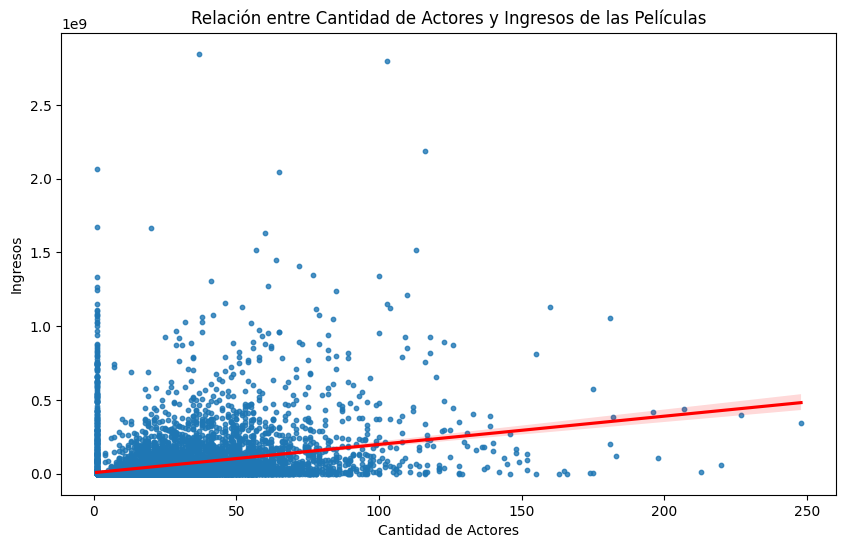

In [17]:
# Filtrar para excluir películas sin título definido
df_filtered = df[df['title'].notnull()].copy()

# Asegurarse de que la columna 'actors' es una cadena
df_filtered['actors'] = df_filtered['actors'].astype(str)

# Separar los nombres de los actores y contarlos
df_filtered['actors_count'] = df_filtered['actors'].apply(lambda x: len(x.split('|')))

# Convertir 'revenue' a numérico (por si hay valores no numéricos)
df_filtered['revenue'] = pd.to_numeric(df_filtered['revenue'], errors='coerce')

# Calcular la correlación entre la cantidad de actores y los ingresos
correlation = df_filtered['actors_count'].corr(df_filtered['revenue'])

print(f"Correlación entre la cantidad de actores y los ingresos: {correlation}")

# Crear un diagrama de dispersión para visualizar la relación
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='actors_count', y='revenue', scatter_kws={'s':10}, line_kws={"color": "red"})
plt.title('Relación entre Cantidad de Actores y Ingresos de las Películas')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Ingresos')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


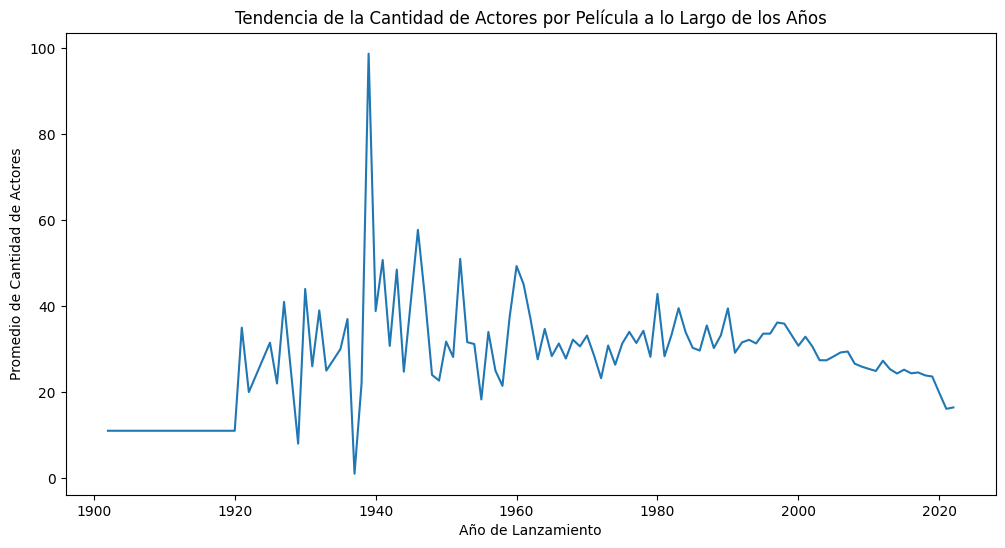

In [18]:
# Filtrar para excluir películas sin título definido
df_filtered = df[df['title'].notnull()].copy()

# Asegurarse de que la columna 'actors' es una cadena
df_filtered['actors'] = df_filtered['actors'].astype(str)

# Separar los nombres de los actores y contarlos
df_filtered['actors_count'] = df_filtered['actors'].apply(lambda x: len(x.split('|')))

# Convertir 'releaseDate' a formato de fecha y extraer el año
df_filtered['release_year'] = pd.to_datetime(df_filtered['releaseDate'], errors='coerce').dt.year

# Agrupar por año y calcular la media de actores por película
actors_per_year = df_filtered.groupby('release_year')['actors_count'].mean().reset_index()

# Crear un gráfico de líneas para visualizar la tendencia
plt.figure(figsize=(12, 6))
sns.lineplot(data=actors_per_year, x='release_year', y='actors_count')
plt.title('Tendencia de la Cantidad de Actores por Película a lo Largo de los Años')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Promedio de Cantidad de Actores')
plt.show()

                 castWomenAmount  castMenAmount  popularity   revenue
castWomenAmount         1.000000      -0.090478   -0.001780 -0.037398
castMenAmount          -0.090478       1.000000    0.002776 -0.060145
popularity             -0.001780       0.002776    1.000000  0.162545
revenue                -0.037398      -0.060145    0.162545  1.000000


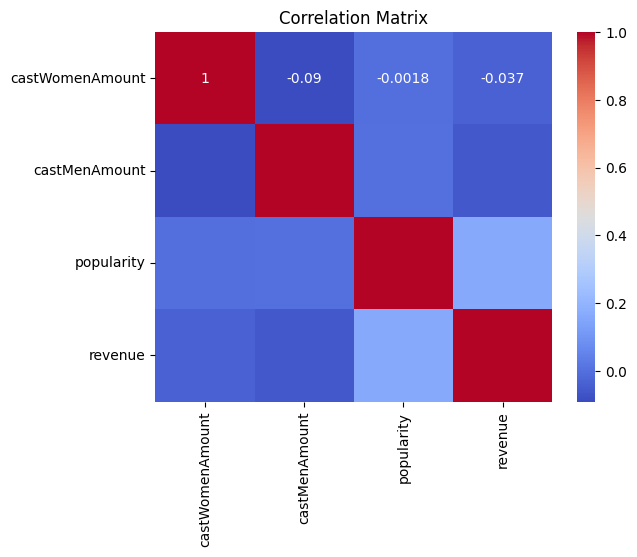

In [20]:
# clean the columns to just have numeric values
df_copy = df.copy()
df_copy['castWomenAmount'] = pd.to_numeric(df_copy['castWomenAmount'], errors='coerce')
df_copy['castMenAmount'] = pd.to_numeric(df_copy['castMenAmount'], errors='coerce')
df_copy['popularity'] = pd.to_numeric(df_copy['popularity'], errors='coerce')
df_copy['revenue'] = pd.to_numeric(df_copy['revenue'], errors='coerce')

# Calculate the correlation matrix
correlation = df_copy[['castWomenAmount', 'castMenAmount', 'popularity', 'revenue']].corr()

# Print the correlation matrix
print(correlation)

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

# Crear una copia del DataFrame para trabajar
df_copy = df.copy()

# Asegurarse de que 'voteAvg' es un número para poder ordenar
df_copy['voteAvg'] = pd.to_numeric(df_copy['voteAvg'], errors='coerce')

# Ordenar las películas por la columna 'voteAvg' de mayor a menor
df_sorted = df_copy.sort_values(by='voteAvg', ascending=False)

# Filtrar las filas donde el director no es NaN
top_20_movies_no_nan = df_sorted[df_sorted['director'].notna()].head(20)

# Agrupar por director y seleccionar la puntuación más alta para cada uno
unique_directors_with_scores = top_20_movies_no_nan.groupby('director')['voteAvg'].max().reset_index()

# Ordenar por puntuación de mayor a menor
unique_directors_with_scores_sorted = unique_directors_with_scores.sort_values(by='voteAvg', ascending=False)

# Mostrar los resultados
print(unique_directors_with_scores_sorted)


In [ ]:
import numpy as np
# Create a copy of the DataFrame for analysis
df_copy = df.copy()

# Convert 'budget' and 'revenue' columns to numeric
df_copy['budget'] = pd.to_numeric(df_copy['budget'], errors='coerce')
df_copy['revenue'] = pd.to_numeric(df_copy['revenue'], errors='coerce')

# Calculate the correlation between 'budget' and 'revenue'
correlation = df_copy['budget'].corr(df_copy['revenue'])

# Create a copy of the DataFrame for analysis
df_copy = df.copy()

# Convert 'budget' and 'revenue' columns to numeric
df_copy['budget'] = pd.to_numeric(df_copy['budget'], errors='coerce')
df_copy['revenue'] = pd.to_numeric(df_copy['revenue'], errors='coerce')

# Calculate the correlation between 'budget' and 'revenue'
correlation = df_copy['budget'].corr(df_copy['revenue'])

# Plot a scatter plot of 'budget' vs 'revenue'
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['budget'], df_copy['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (Millions)')
plt.ylabel('Revenue (Billions)')

# Fit a polynomial regression line to the data points
coefficients = np.polyfit(df_copy['budget'], df_copy['revenue'], 1)
poly_line = np.poly1d(coefficients)
plt.plot(df_copy['budget'], poly_line(df_copy['budget']), color='red')

plt.show()


# Plot a histogram of 'budget' and 'revenue'
plt.figure(figsize=(10, 6))
plt.hist(df_copy['budget'], bins=20, alpha=0.5, label='Budget')
plt.hist(df_copy['revenue'], bins=20, alpha=0.5, label='Revenue')
plt.title('Budget and Revenue Histogram')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Correlation between budget and revenue:", correlation)


In [ ]:
# (7 puntos) ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?
df_copy = df.copy()

# Extract the month from the 'releaseDate' column
df_copy['month'] = pd.to_datetime(df_copy['releaseDate']).dt.month

# Group by month and calculate the average revenue
average_revenue_by_month = df_copy.groupby('month')['revenue'].mean()

# Plot the average revenue by month
plt.figure(figsize=(10, 6))
average_revenue_by_month.plot(kind='bar')
plt.title('Average Revenue by Launch Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue (1e7)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# print the average revenue by month
print(average_revenue_by_month)


In [ ]:
df_copy = df.copy()
df_copy['month'] = pd.to_datetime(df_copy['releaseDate']).dt.month


# Filter the DataFrame to select movies with non-zero revenue
highest_revenue_movies = df_copy[df_copy['revenue'] > 0].sort_values(by='revenue', ascending=True).head(10)

# Extract the month from the 'releaseDate' column and convert it to the month name
highest_revenue_movies['month'] = pd.to_datetime(highest_revenue_movies['releaseDate']).dt.strftime('%B')

# Display the titles, months, and revenues of the movies with the highest revenue
print(highest_revenue_movies[['title', 'month', 'revenue']].sort_values(by='revenue'))

# Calculate the average number of movies released per month
average_movies_per_month = df_copy.groupby('month').size().mean()
print("Average number of movies released per month:", average_movies_per_month)

# Calculate the number of movies released per month
movies_per_month = df_copy.groupby('month').size()

# Plot the number of movies per month with month names
plt.figure(figsize=(10, 6))
movies_per_month.plot(kind='bar')
plt.title('Number of Movies Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# Add a line representing the average number of movies released per month
plt.axhline(average_movies_per_month, color='red', linestyle='--', label='Average')

plt.legend()
plt.show()



In [ ]:
df_copy = df.copy()


# Calculate the correlation between 'voteAvg' and 'revenue'
correlation = df_copy['voteAvg'].corr(df_copy['revenue'])

# Create a scatter plot of 'voteAvg' vs 'revenue'
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['voteAvg'], df_copy['revenue'], alpha=0.5)
plt.title('Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

print("Correlation between voteAvg and revenue:", correlation)


In [ ]:
#¿A qué género principal pertenecen las películas más largas?

df_copy = df.copy()

# Convertir la columna 'runtime' a numérica (por si acaso hay valores no numéricos)
df_copy['runtime'] = pd.to_numeric(df_copy['runtime'], errors='coerce')

# Ordenar las películas por duración de mayor a menor
df_sorted = df_copy.sort_values(by='runtime', ascending=False)

# Obtener el género principal de cada película (el primero en la lista de géneros)
df_sorted['main_genre'] = df_sorted['genres'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else x)

# Analizar los géneros de las películas más largas
# Por ejemplo, podríamos mirar las 50 películas más largas
top_genres = df_sorted.head(50)['main_genre']

# Identificar el género más común entre las películas más largas
most_common_genre = top_genres.value_counts().idxmax()

print(f"El género principal más común entre las películas más largas es: {most_common_genre}")

# graph the number of large movies by genre
plt.figure(figsize=(10, 6))
top_genres.value_counts().plot(kind='bar')
plt.title('Number of Long Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


### Extras

In [ ]:
df_copy = df.copy()

# Convert 'releaseDate' column to datetime type
df_copy['releaseDate'] = pd.to_datetime(df_copy['releaseDate'])

# Group the DataFrame by release year and calculate the average runtime
average_runtime_by_year = df_copy.groupby(df_copy['releaseDate'].dt.year)['runtime'].mean()

# Plot the average runtime by year
plt.figure(figsize=(10, 6))
average_runtime_by_year.plot(kind='line')
plt.title('Average Runtime of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.show()

# print the average runtime by year all without ...
print(average_runtime_by_year)


In [ ]:
# ¿Cómo se distribuyen las películas según el idioma original en el que fueron producidas?

df_copy = df.copy()

# Count the frequency of each original language
language_counts = df_copy['originalLanguage'].value_counts()

# Plot the frequency graph
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Distribution of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Que paises producen mas peliculas en los ultimos 5 años

import datetime

# Create a copy of the DataFrame for analysis
df_copy = df.copy()

# Convert 'releaseDate' column to datetime type
df_copy['releaseDate'] = pd.to_datetime(df_copy['releaseDate'])

# Filter the DataFrame to select movies released in the last 5 years
current_year = datetime.datetime.now().year
last_5_years = range(current_year - 4, current_year + 1)
df_filtered = df_copy[df_copy['releaseDate'].dt.year.isin(last_5_years)]

# Count the frequency of movies produced by each country
country_counts = df_filtered['productionCountry'].value_counts()

# Select the top 10 countries and group the rest as "Other"
top_10_countries = country_counts.head(10)
other_count = country_counts[10:].sum()
top_10_countries['Other'] = other_count

# Define colors for the pie chart
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'lightgreen']

# Plot the pie graph
plt.figure(figsize=(10, 6))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Movie Production by Country in the Last 5 Years')
plt.axis('equal')
plt.show()


In [ ]:
#  ¿Cuáles son los 5 actores que más aparecen en las 50 películas con mayores ingresos?

# Sort the DataFrame by 'revenue' in descending order and select the top 50 movies
top_50_movies = df_copy.sort_values(by='revenue', ascending=False).head(50)

# Extract the cast information for the top 50 movies
cast_info = top_50_movies['actors'].str.split('|')

# Flatten the cast information into a single list
all_actors = [actor for cast in cast_info for actor in cast]

# Find the duplicates in the cast information
duplicates = [actor for actor in all_actors if all_actors.count(actor) > 1]

# Count the occurrences of each actor in the duplicates
actor_counts = {actor: duplicates.count(actor) for actor in set(duplicates)}

# Select the top 5 most repeated actors
top_5_actors = sorted(actor_counts, key=actor_counts.get, reverse=True)[:5]

# remove "FALSE" from the list of actors
top_5_actors.remove("FALSE")

print("Top most repeated actors in the top 50 most grossing movies:")
for actor in top_5_actors:
    print(actor)



In [5]:
# ¿Cuál es la relación entre la cantidad de géneros de una película y sus ingresos?

df_copy = df.copy()

correlation = df_copy['genresAmount'].corr(df_copy['revenue'])
print("Correlation between genresAmount and revenue:", correlation)


Correlation between genresAmount and revenue: 0.13627831764306778


In [9]:
# ¿Existe una correlación entre el presupuesto invertido por las compañías productoras en una película y los ingresos generados por esas películas? 

df_copy = df.copy()

# Limpieza de los datos para manejar las compañías de producción separadas por "|"
df_copy['productionCompany'] = df_copy['productionCompany'].str.split('|')
df_copy = df_copy.explode('productionCompany')

# Calculate the correlation between budget and revenue
correlation = df_copy['budget'].corr(df_copy['revenue'])

# Get the top 5 spending production companies
top_spending_companies = df_copy.groupby('productionCompany')['budget'].sum().nlargest(5)

# Calculate the sum of their budget
total_budget = top_spending_companies.sum()

# Print the top 5 spending production companies and their total budget
print("Top 5 Spending Production Companies:")
print(top_spending_companies)
print("Total Budget of Top 5 Spending Production Companies:", total_budget)

# Get the top 5 most revenued production companies
top_revenue_companies = df_copy.groupby('productionCompany')['revenue'].sum().nlargest(5)

# Calculate the sum of their revenue
total_revenue = top_revenue_companies.sum()

# Print the top 5 most revenued production companies and their total revenue
print("\nTop 5 Most Revenued Production Companies:")
print(top_revenue_companies)
print("Total Revenue of Top 5 Most Revenued Production Companies:", total_revenue)


Top 5 Spending Production Companies:
productionCompany
Warner Bros. Pictures    25548927834
Universal Pictures       18182211864
Columbia Pictures        17011635000
Walt Disney Pictures     15955875223
Paramount                14740285844
Name: budget, dtype: int64
Total Budget of Top 5 Spending Production Companies: 91438935765

Top 5 Most Revenued Production Companies:
productionCompany
Warner Bros. Pictures    73640311482
Universal Pictures       60766812506
20th Century Fox         53680594765
Walt Disney Pictures     50618246120
Columbia Pictures        49716805742
Name: revenue, dtype: int64
Total Revenue of Top 5 Most Revenued Production Companies: 288422770615
